In [ ]:
#WEEK 4 - Device/Activity Cohort Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("Indian_Kids_Screen_Time_Updated.csv")

# Set style
sns.set(style="whitegrid", palette="Set2")

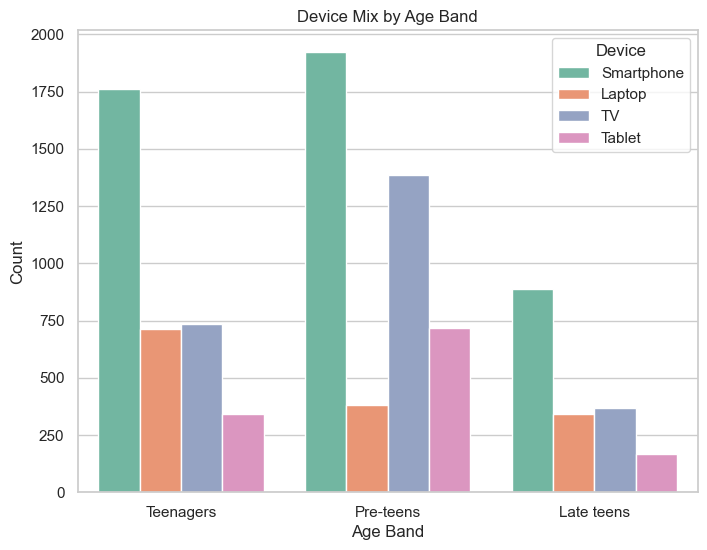

In [2]:
# =====================================================
# 1. Device mix by Age Band (Countplot)
# =====================================================
plt.figure(figsize=(8,6))
sns.countplot(x='Age_Band', hue='Primary_Device', data=data)
plt.title("Device Mix by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.legend(title="Device")
plt.show()

In [ ]:
OBSERVATION:
Teenagers mostly use smartphones, while pre-teens balance between smartphones and tablets.
Device preference clearly shifts toward more portable gadgets with increasing age.

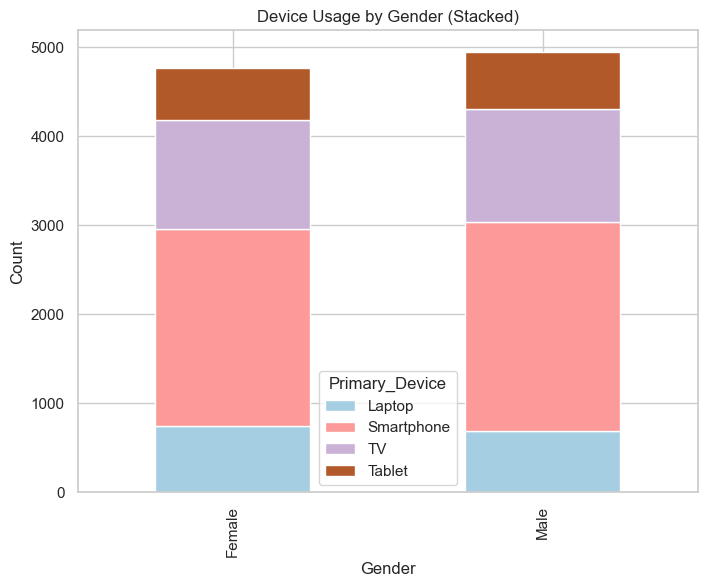

In [3]:
# =====================================================
# 2. Device mix by Gender (Stacked Bar Chart)
# =====================================================
device_gender = pd.crosstab(data['Gender'], data['Primary_Device'])
device_gender.plot(kind='bar', stacked=True, figsize=(8,6), colormap="Paired")
plt.title("Device Usage by Gender (Stacked)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [ ]:
OBSERVATION:
Males prefer smartphones more than females, while females use tablets slightly more.
Overall, smartphones dominate across both genders irrespective of category.

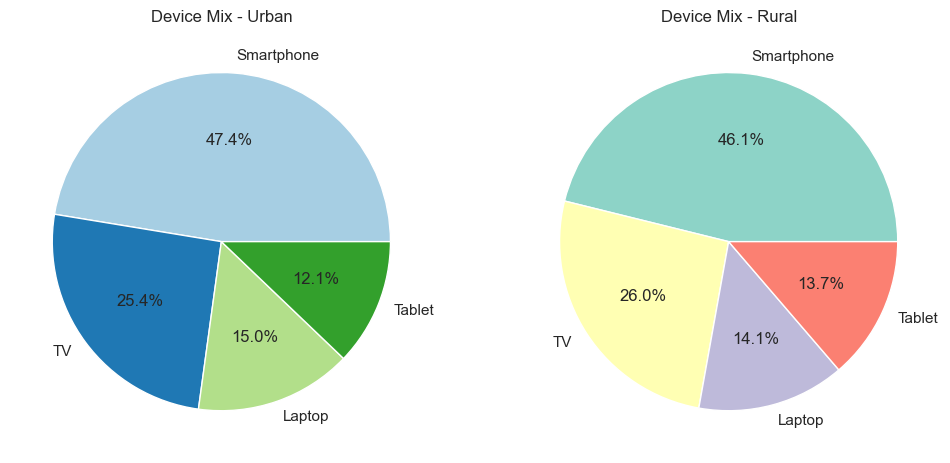

In [4]:
# =====================================================
# 3. Device mix by Urban vs Rural (Pie Charts side-by-side)
# =====================================================
fig, axes = plt.subplots(1,2, figsize=(12,6))
data[data['Urban_or_Rural']=='Urban']['Primary_Device'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axes[0], colors=plt.cm.Paired.colors)
axes[0].set_title("Device Mix - Urban")
axes[0].set_ylabel("")

data[data['Urban_or_Rural']=='Rural']['Primary_Device'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axes[1], colors=plt.cm.Set3.colors)
axes[1].set_title("Device Mix - Rural")
axes[1].set_ylabel("")
plt.show()


In [ ]:
OBSERVATION:
Urban users show heavy smartphone dependence compared to rural counterparts.
Rural kids display slightly more diversity in device choices like tablets and desktops.

In [6]:
import warnings
warnings.filterwarnings('ignore')


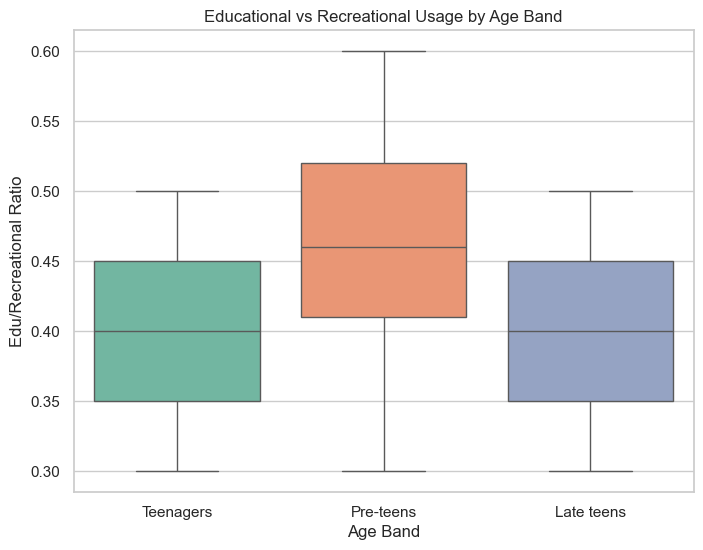

In [7]:
# =====================================================
# 4. Educational vs Recreational Ratio across Age Band
# =====================================================
plt.figure(figsize=(8,6))
sns.boxplot(x="Age_Band", y="Educational_to_Recreational_Ratio", data=data, palette="Set2")
plt.title("Educational vs Recreational Usage by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Edu/Recreational Ratio")
plt.show()


In [ ]:
OBSERVATION:
Pre-teens spend more screen time on educational activities than teenagers.
Teenagers' higher recreational ratio indicates a shift toward entertainment-based use.

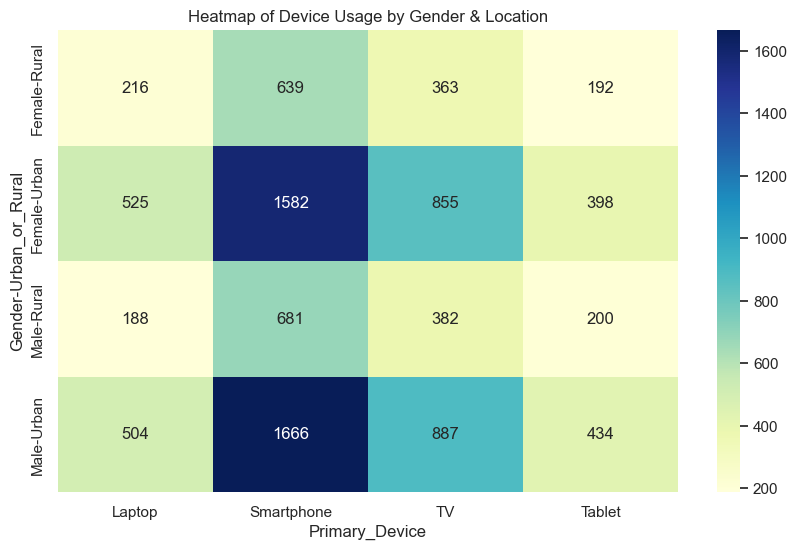

In [8]:
# =====================================================
# 5. Heatmap - Device vs Gender vs Urban/Rural
# =====================================================
pivot_table = pd.crosstab([data['Gender'], data['Urban_or_Rural']], data['Primary_Device'])
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Device Usage by Gender & Location")
plt.show()


In [ ]:
OBSERVATION:
Urban males record the highest smartphone usage, followed by urban females.
Rural areas show balanced but lower device penetration overall.

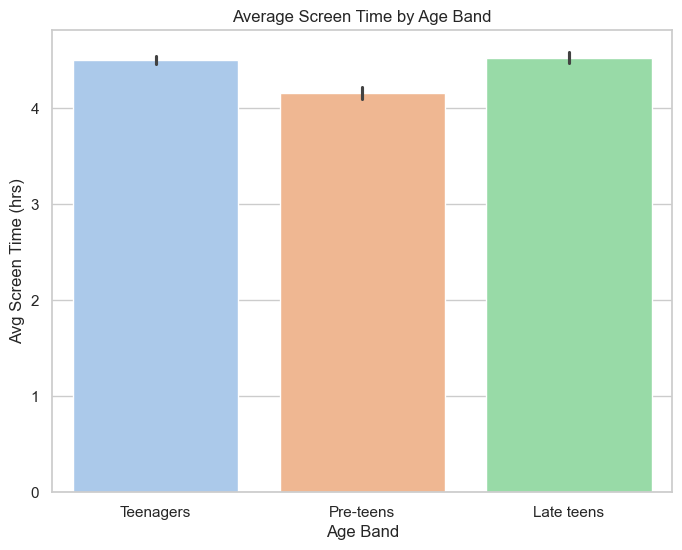

In [9]:
# =====================================================
# 6. Average Screen Time by Age Band (Bar Chart)
# =====================================================
plt.figure(figsize=(8,6))
sns.barplot(x="Age_Band", y="Avg_Daily_Screen_Time_hr", data=data, estimator="mean", palette="pastel")
plt.title("Average Screen Time by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Avg Screen Time (hrs)")
plt.show()


In [ ]:
OBSERVATION:
Teenagers have the highest average screen time exceeding 3.5 hours daily.
Pre-teens maintain moderate screen exposure closer to recommended limits.

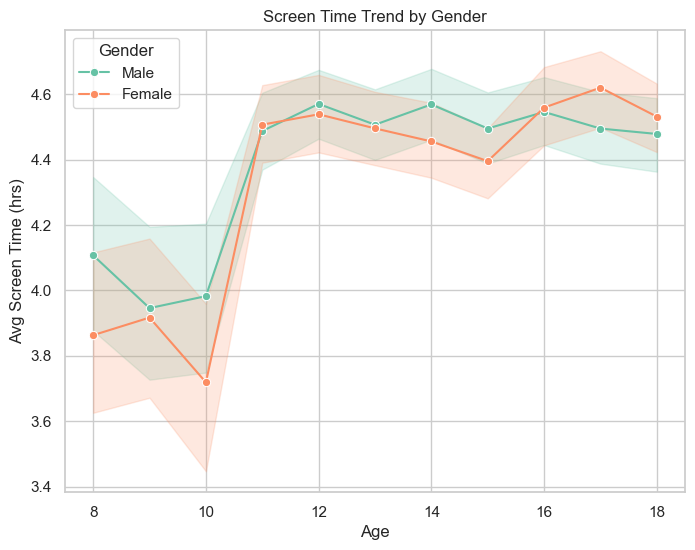

In [10]:
# =====================================================
# 7. Screen Time Trend by Gender (Line Plot)
# =====================================================
plt.figure(figsize=(8,6))
sns.lineplot(x="Age", y="Avg_Daily_Screen_Time_hr", hue="Gender", data=data, marker="o")
plt.title("Screen Time Trend by Gender")
plt.xlabel("Age")
plt.ylabel("Avg Screen Time (hrs)")
plt.show()


In [ ]:
OBSERVATION:
Screen time increases steadily with age for both genders.
Males show slightly higher engagement, likely due to gaming and social media activity.

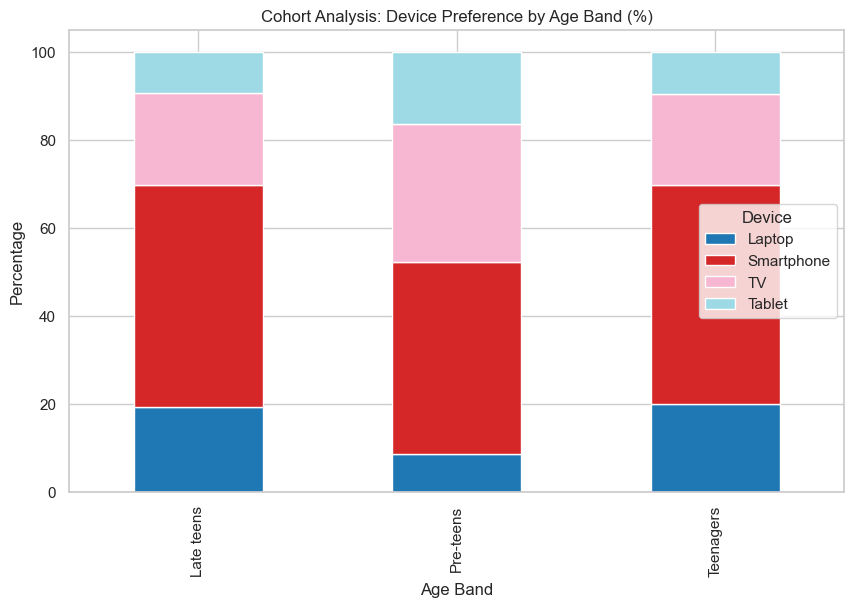

In [11]:
# =====================================================
# 8. Cohort Analysis - Device Preference by Age Cohorts
# =====================================================
cohort = pd.crosstab(data['Age_Band'], data['Primary_Device'], normalize="index") * 100
cohort.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Cohort Analysis: Device Preference by Age Band (%)")
plt.xlabel("Age Band")
plt.ylabel("Percentage")
plt.legend(title="Device")
plt.show()


In [ ]:
OBSERVATION:
Portable devices dominate across all age cohorts, especially smartphones.
Teenagers display the sharpest rise in smartphone dependency among all groups.

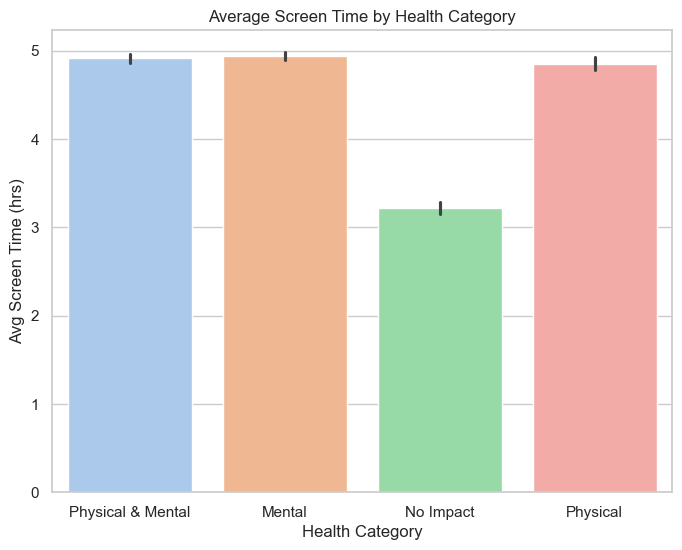

In [12]:
# =====================================================
# 9. Average Screen Time by Health Category
# =====================================================
plt.figure(figsize=(8,6))
sns.barplot(x="Health_Category", y="Avg_Daily_Screen_Time_hr", data=data, estimator="mean", palette="pastel")
plt.title("Average Screen Time by Health Category")
plt.xlabel("Health Category")
plt.ylabel("Avg Screen Time (hrs)")
plt.show()


In [ ]:
OBSERVATION:
Physical health issues (like eye strain or obesity risk) show higher screen times.
High screen time → More health risks

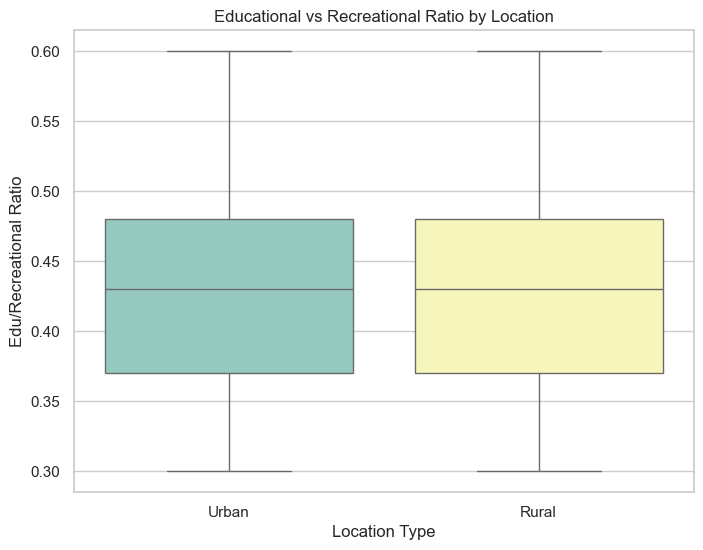

In [15]:
# =====================================================
# 10. Urban vs Rural Educational vs Recreational Ratio
# =====================================================
plt.figure(figsize=(8,6))
sns.boxplot(x="Urban_or_Rural", y="Educational_to_Recreational_Ratio", data=data, palette="Set3")
plt.title("Educational vs Recreational Ratio by Location")
plt.xlabel("Location Type")
plt.ylabel("Edu/Recreational Ratio")
plt.show()


In [ ]:
OBSERVATION:
Urban users show a more balanced ratio, while rural users lean more toward recreational content.
Rural users watch more for fun.

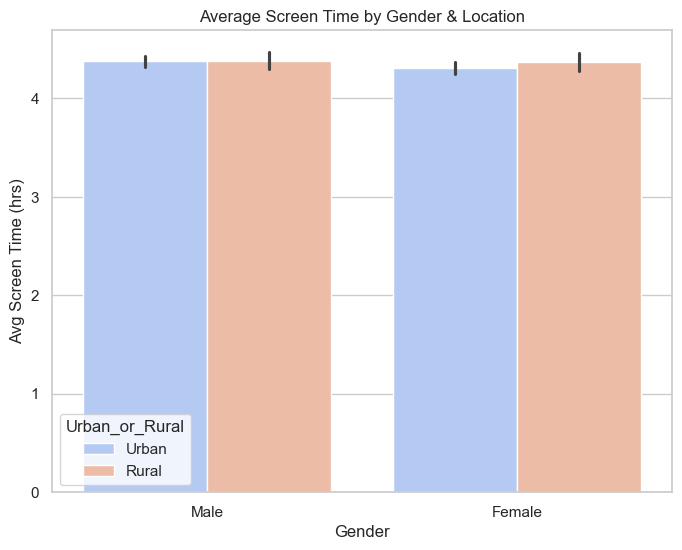

In [16]:
# =====================================================
# 11. Average Screen Time by Gender and Location
# =====================================================
plt.figure(figsize=(8,6))
sns.barplot(x="Gender", y="Avg_Daily_Screen_Time_hr", hue="Urban_or_Rural", data=data, estimator="mean", palette="coolwarm")
plt.title("Average Screen Time by Gender & Location")
plt.xlabel("Gender")
plt.ylabel("Avg Screen Time (hrs)")
plt.show()

In [ ]:
OBSERVATION:
Urban males record the highest screen time among all demographics.
Urban males are mostly active.

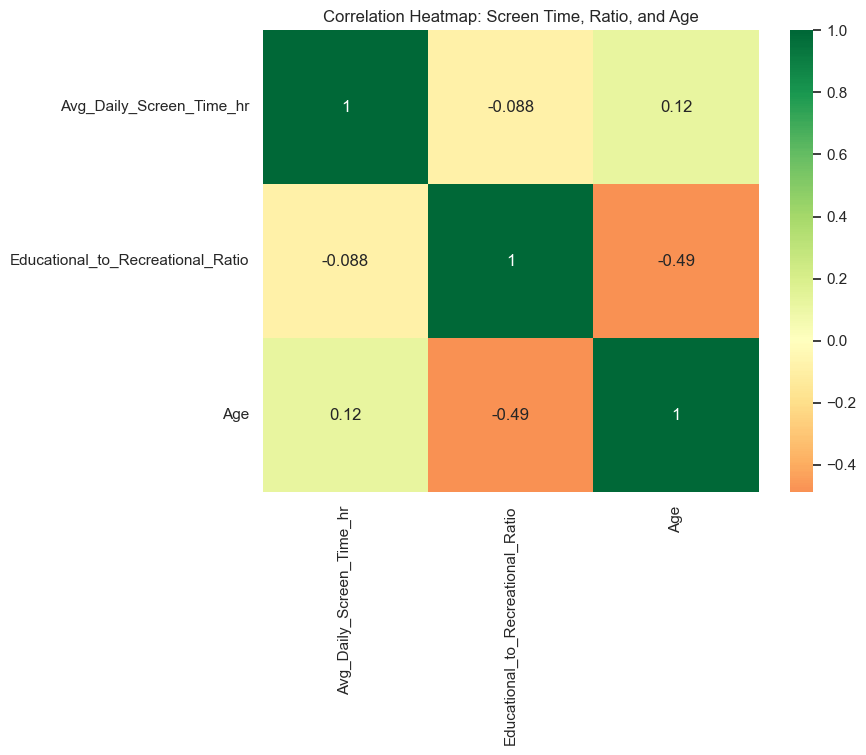

In [17]:
# =====================================================
# 12. Heatmap: Correlation between Screen Time, Ratio, and Age
# =====================================================
plt.figure(figsize=(8,6))
sns.heatmap(data[["Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio", "Age"]].corr(), annot=True, cmap="RdYlGn", center=0)
plt.title("Correlation Heatmap: Screen Time, Ratio, and Age")
plt.show()


In [ ]:
OBSERVATION:
Screen time has mild negative correlation with educational ratio and weak correlation with age.
Mild negative link between time & study

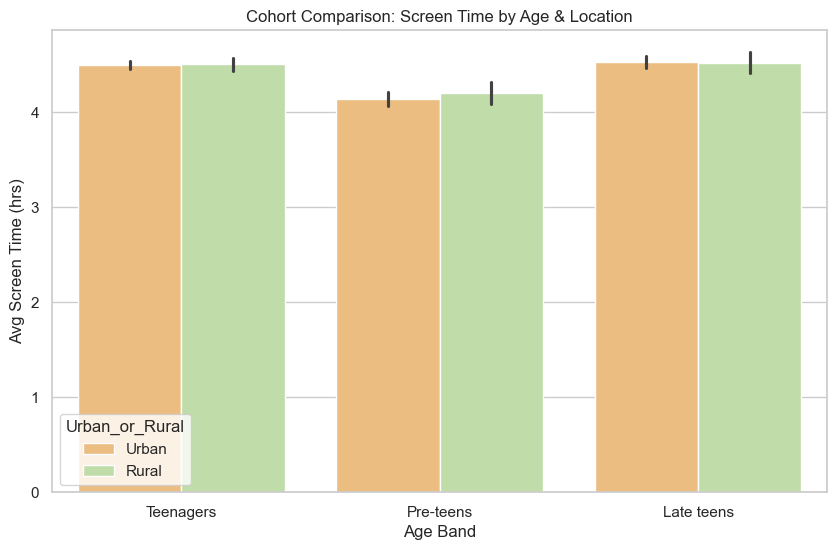

In [18]:
# =====================================================
# 13. Screen Time Cohort Comparison by Age Band and Location
# =====================================================
plt.figure(figsize=(10,6))
sns.barplot(x="Age_Band", y="Avg_Daily_Screen_Time_hr", hue="Urban_or_Rural", data=data, estimator="mean", palette="Spectral")
plt.title("Cohort Comparison: Screen Time by Age & Location")
plt.xlabel("Age Band")
plt.ylabel("Avg Screen Time (hrs)")
plt.show()


In [ ]:
OBSERVATION:
Urban teenagers show the longest screen time hours among all cohorts.
Urban teens top the list.

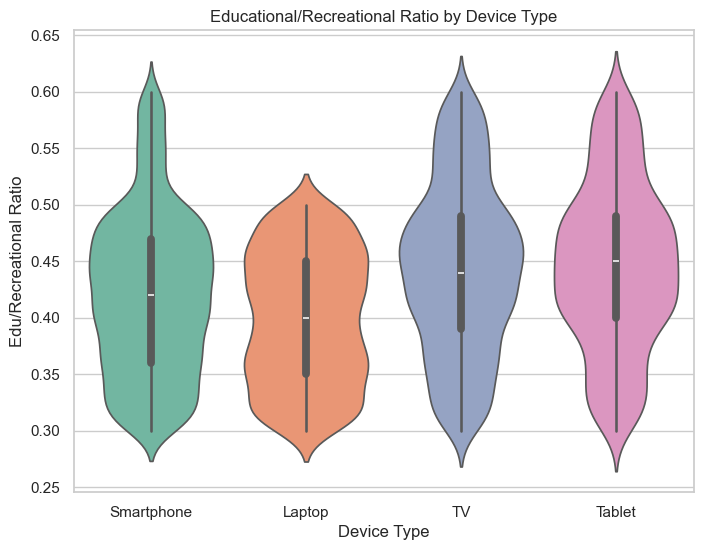

In [19]:
# =====================================================
# 14. Educational vs Recreational Ratio by Device Type
# =====================================================
plt.figure(figsize=(8,6))
sns.violinplot(x="Primary_Device", y="Educational_to_Recreational_Ratio", data=data, palette="Set2")
plt.title("Educational/Recreational Ratio by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Edu/Recreational Ratio")
plt.show()


In [ ]:
OBSERVATION:
Tablets tend to have slightly higher educational ratios than smartphones or desktops.
Tablets more education-oriented.